In [104]:
import os 
import sqlite3
from datetime import datetime

today_date = datetime.now().strftime("%Y%m%d")
# today_date = '20240109'
chaegul_db = f'{today_date}_chaegul.db'
hoga_db = f'{today_date}_hoga.db'


conn_chaegul = sqlite3.connect(chaegul_db)
conn_hoga = sqlite3.connect(hoga_db)

cursor_chaegul = conn_chaegul.cursor()
cursor_hoga = conn_hoga.cursor()


20240110_chaegul.db


### 체결

In [102]:
cursor_chaegul.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor_chaegul.fetchall()
code_list = []
for table in tables:

    if table[0] != 'sqlite_sequence':
        code_list.append(table[0])
        # print(table[0])

print(len(code_list)) 

code1 = code_list[2]

0


IndexError: list index out of range

In [97]:
cursor_chaegul.execute(f'PRAGMA table_info("{code1}")')
columns = cursor_chaegul.fetchall()
for column in columns[1:]:
    print(column[1])  # Column name is in the second position

체결시간
현재가
거래량


In [82]:
import pandas as pd
# pd.set_option('display.max_rows', None)  # Set to None to display all rows

cursor_chaegul.execute(f'SELECT * FROM "{code1}"')

rows = cursor_chaegul.fetchall()

time = []
current_price = []
volume = []

for row in rows:
    time.append(row[1])
    current_price.append(int(row[2]))
    volume.append(int(row[3]))
    
    
data = {
    '체결시간' : time,
    '현재가': current_price,  # Current price
    '거래량': volume        # Trading volume
}
df = pd.DataFrame(data)
df


,체결시간,현재가,거래량
0,150804,9630,10
1,150811,9630,10
2,150812,9630,51
3,150814,9630,1
4,150815,9630,10
...,...,...,...
66,151947,9610,-4
67,151950,9630,1
68,151952,9630,24
69,151959,9630,2


In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
volume = []
x_tick = []

for i in range(8,20):
    min = str(i)
    if len(min) == 1:
        min = '0'+min
        
    filtered_df_volume = df[df['체결시간'].str[2:4] == min]['거래량']



    abs_volume = int(filtered_df_volume.abs().sum())
    print(min)
    print(abs_volume)
    
    volume.append(abs_volume)
    
    time = f"15{min}"
    x_tick.append(time)


08
1816
09
1078
10
0
11
0
12
0
13
0
14
0
15
0
16
702
17
13
18
791
19
2201


In [84]:
print(volume)

[1816, 1078, 0, 0, 0, 0, 0, 0, 702, 13, 791, 2201]


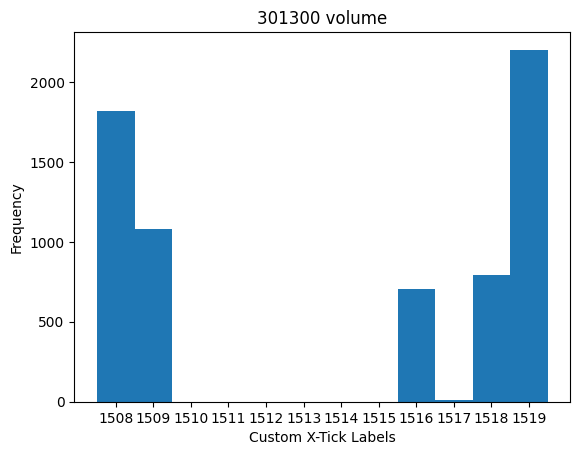

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Example bin edges and values
bin_edges = np.arange(len(volume) + 1) # Example bin edges
# bin_values = [10, 20, 15, 30, 25]  # Counts or frequencies for each bin
# x_tick_labels = ['A', 'B', 'C', 'D', 'E']  # Custom labels for each bin

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create the plot
plt.bar(bin_centers, volume , align='center', width=np.diff(bin_edges))

# Set the custom x-tick labels
plt.xticks(bin_centers, x_tick)

# Adding labels and title
plt.xlabel('Custom X-Tick Labels')
plt.ylabel('Frequency')
plt.title(f'{code1} volume')

# Show the plot
plt.show()


### 호가

In [7]:
cursor_hoga.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor_hoga.fetchall()
code_list = []
for table in tables:

    if table[0] != 'sqlite_sequence':
        code_list.append(table[0])
        # print(table[0])

print(len(code_list)) 

code1 = code_list[0]


88


In [16]:
cursor_hoga.execute(f'PRAGMA table_info("{code1}")')
columns = cursor_hoga.fetchall()
for column in columns[1:]:
    print(column[1])  # Column name is in the second position


호가시간
매도호가10
매도호가수량10
매도호가직전대비10
매도호가9
매도호가수량9
매도호가직전대비9
매도호가8
매도호가수량8
매도호가직전대비8
매도호가7
매도호가수량7
매도호가직전대비7
매도호가6
매도호가수량6
매도호가직전대비6
매도호가5
매도호가수량5
매도호가직전대비5
매도호가4
매도호가수량4
매도호가직전대비4
매도호가3
매도호가수량3
매도호가직전대비3
매도호가2
매도호가수량2
매도호가직전대비2
매도호가1
매도호가수량1
매도호가직전대비1
매수호가1
매수호가수량1
매수호가직전대비1
매수호가2
매수호가수량2
매수호가직전대비2
매수호가3
매수호가수량3
매수호가직전대비3
매수호가4
매수호가수량4
매수호가직전대비4
매수호가5
매수호가수량5
매수호가직전대비5
매수호가6
매수호가수량6
매수호가직전대비6
매수호가7
매수호가수량7
매수호가직전대비7
매수호가8
매수호가수량8
매수호가직전대비8
매수호가9
매수호가수량9
매수호가직전대비9
매수호가10
매수호가수량10
매수호가직전대비10


In [12]:
cursor_hoga.execute(f'SELECT * FROM "{code1}"')

rows = cursor_hoga.fetchall()
for row in rows:
    print(row)

(1, '150805', '+2855', '15178', '0', '+2850', '20779', '0', '+2845', '28802', '0', '+2840', '38381', '0', '+2835', '16150', '0', '+2830', '9356', '0', '+2825', '9921', '0', '+2820', '14860', '0', '+2815', '17846', '0', '+2810', '22679', '0', '+2805', '8296', '-1', '+2800', '12476', '-39', '+2795', '9709', '0', '+2790', '13166', '0', '+2785', '7696', '0', '+2780', '22806', '0', '+2775', '13918', '0', '+2770', '13708', '0', '+2765', '13048', '0', '+2760', '55031', '0')
(2, '150805', '+2855', '15178', '0', '+2850', '20779', '0', '+2845', '28802', '0', '+2840', '38381', '0', '+2835', '16150', '0', '+2830', '9356', '0', '+2825', '9921', '0', '+2820', '14860', '0', '+2815', '17846', '0', '+2810', '22678', '-1', '+2805', '8306', '+10', '+2800', '12476', '0', '+2795', '9709', '0', '+2790', '13166', '0', '+2785', '7696', '0', '+2780', '22806', '0', '+2775', '13908', '-10', '+2770', '13708', '0', '+2765', '13048', '0', '+2760', '55031', '0')
(3, '150806', '+2855', '15178', '0', '+2850', '20779',

In [18]:
import pandas as pd

# Example data: time and some other value
data = {
    'Time': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Value': [1, 3, 2, 5, 7, 6, 8, 9, 10, 11]
}

df = pd.DataFrame(data)


<IPython.core.display.Javascript object>

c:\Users\pari0\anaconda3\envs\simulator\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
